In [1]:
#import library yang diperlukan
from operator import index
import pandas as pd
import csv
import numpy as np
# from predatatestcaca import predict, testing, mydb
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('DataSiapPOS.csv', index_col=0)
class_labels = pd.read_csv('readytfidf3.csv')
class_labels = class_labels['Status']
df_new = pd.concat([df, class_labels], axis=1)
# df_new = df_new.sample(frac = 1)
# print(df_new['Status'])
X = df_new.drop(['Status'], axis=1)
y = df_new['Status']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [12]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
print('Akurasi setelah pakai POS : ',svm.score(X_test, y_test))
hasil = svm.predict(X_test)

Akurasi setelah pakai POS :  0.8269018743109151


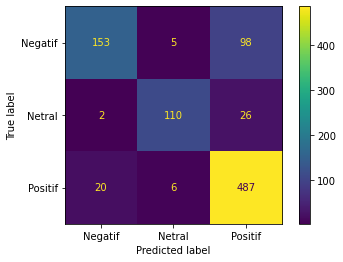

In [13]:
plot_confusion_matrix(svm, X_test, y_test)

In [14]:
print(confusion_matrix(y_test, hasil))
print(classification_report(y_test, hasil))

[[153   5  98]
 [  2 110  26]
 [ 20   6 487]]
              precision    recall  f1-score   support

     Negatif       0.87      0.60      0.71       256
      Netral       0.91      0.80      0.85       138
     Positif       0.80      0.95      0.87       513

    accuracy                           0.83       907
   macro avg       0.86      0.78      0.81       907
weighted avg       0.84      0.83      0.82       907



In [15]:
from sklearn.metrics import accuracy_score

In [16]:
hasil = svm.predict(X_test)
accuracy_score(y_test, hasil)

0.8269018743109151

In [10]:
svm.score(X_test, y_test)

0.8161764705882353